# importing libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("gurgaon_10k_2.csv")
df1.head()

,PREFERENCE,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,...,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,LISTING,BROKERAGE,AMENITIES,AREA,PRICE,CLASS_LABEL,TOTAL_LANDMARK_COUNT
0,S,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,8766,4,...,26.0,26300000,26300000,R,263000.0,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",3434 sq.ft.,2.63 Cr,Dealer,10.0
1,S,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,21176,4,...,29.0,36000000,36000000,R,1.0,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",2870 sq.ft.,3.6 Cr,Dealer,9.0
2,R,Residential Apartment,Sector 66 Gurgaon,NaN,0,3.0,3,2.0,43,1,...,17.0,85000,85000,R,42000.0,"32,17,2,5,20,21,44,23,45,24,46,47,28,29,30,39,...",1950 sq.ft.,"85,000",Dealer,14.0
3,S,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,13740,4,...,28.0,38500000,38500000,R,1.0,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",2802 sq.ft.,3.85 Cr,Dealer,8.0
4,R,Residential Apartment,Sector 104 Gurgaon,NaN,0,3.0,4,4.0,17,4,...,27.0,40000,40000,R,1.0,"2,20,21,44,23,46,28,1,6,9,40,30,41,12,25,26,3,31",2290 sq.ft.,"40,000",Dealer,14.0


In [4]:
df1.shape

(10704, 23)

In [5]:
df2=df1

# data preprocessing 

In [7]:
df2.iloc[:,0].unique()  # s=sale , r=rent

array(['S', 'R'], dtype=object)

In [8]:
df2.isnull().sum()

PREFERENCE                0
PROPERTY_TYPE             0
LOCALITY                  0
TRANSACT_TYPE           552
OWNTYPE                   0
BEDROOM_NUM             193
BATHROOM_NUM              0
BALCONY_NUM             203
PRICE_PER_UNIT_AREA       0
FURNISH                   0
FACING                    0
AGE                       0
FLOOR_NUM               900
TOTAL_FLOOR               7
MIN_PRICE                 0
MAX_PRICE                 0
LISTING                   0
BROKERAGE                81
AMENITIES                84
AREA                      0
PRICE                     0
CLASS_LABEL               0
TOTAL_LANDMARK_COUNT     66
dtype: int64

In [9]:
df2['TRANSACT_TYPE'].unique()

array([ 1., nan,  2.])

In [10]:
df2 = df2.dropna(subset=['TRANSACT_TYPE','BEDROOM_NUM','BALCONY_NUM','TOTAL_FLOOR','BROKERAGE','AMENITIES','TOTAL_LANDMARK_COUNT','FLOOR_NUM'])


In [11]:
df2['TRANSACT_TYPE'].unique()

array([1., 2.])

In [12]:
df2.shape

(9157, 23)

In [13]:
df2['OWNTYPE'].unique()

array([1, 3, 4, 2])

In [14]:
df2.isnull().sum()

PREFERENCE              0
PROPERTY_TYPE           0
LOCALITY                0
TRANSACT_TYPE           0
OWNTYPE                 0
BEDROOM_NUM             0
BATHROOM_NUM            0
BALCONY_NUM             0
PRICE_PER_UNIT_AREA     0
FURNISH                 0
FACING                  0
AGE                     0
FLOOR_NUM               0
TOTAL_FLOOR             0
MIN_PRICE               0
MAX_PRICE               0
LISTING                 0
BROKERAGE               0
AMENITIES               0
AREA                    0
PRICE                   0
CLASS_LABEL             0
TOTAL_LANDMARK_COUNT    0
dtype: int64

In [15]:
df2['TOTAL_FLOOR'].unique()

array([26., 29., 28., 27., 30.,  3., 39., 17., 21., 20., 14., 42.,  4.,
       36., 40., 32., 12., 11., 25., 18., 51., 38., 24., 34., 19.,  2.,
       35., 23., 48.,  7., 15., 13., 16., 45., 22.,  5., 33., 31., 10.,
        9.,  6., 47., 43.,  8.,  1., 37.,  0., 41., 44., 50.])

In [16]:
df2['FLOOR_NUM'].unique()

array(['14', '7', '4', '12', 'G', '39', '16', '1', '10', '2', '33', '8',
       '5', '9', '3', '25', '11', '18', '13', '29', '15', '28', '6', '19',
       '48', '38', '36', '37', '20', '17', '45', '24', '21', '22', '23',
       '27', 'L', '35', '30', '32', '26', '34', '40', '0', '31', 'B',
       '42'], dtype=object)

In [17]:
count_B = df2[df2['FLOOR_NUM'] == 'B'].shape[0]
count_L = df2[df2['FLOOR_NUM'] == 'L'].shape[0]
count_G = df2[df2['FLOOR_NUM'] == 'G'].shape[0]

In [18]:
count_B

4

In [19]:
count_L

25

In [20]:
count_G

364

In [21]:
df2 = df2[~df2['FLOOR_NUM'].isin(['B', 'L'])]

In [22]:
df2['FLOOR_NUM'].unique()

array(['14', '7', '4', '12', 'G', '39', '16', '1', '10', '2', '33', '8',
       '5', '9', '3', '25', '11', '18', '13', '29', '15', '28', '6', '19',
       '48', '38', '36', '37', '20', '17', '45', '24', '21', '22', '23',
       '27', '35', '30', '32', '26', '34', '40', '0', '31', '42'],
      dtype=object)

In [23]:
df2['FLOOR_NUM'] = df2['FLOOR_NUM'].replace('G', "0")

In [24]:
df2['FLOOR_NUM'].unique()

array(['14', '7', '4', '12', '0', '39', '16', '1', '10', '2', '33', '8',
       '5', '9', '3', '25', '11', '18', '13', '29', '15', '28', '6', '19',
       '48', '38', '36', '37', '20', '17', '45', '24', '21', '22', '23',
       '27', '35', '30', '32', '26', '34', '40', '31', '42'], dtype=object)

In [25]:
df2['FLOOR_NUM'].astype(object)

0        14
1         7
3        14
5         4
7        12
         ..
10699    16
10700    18
10701    10
10702    10
10703     1
Name: FLOOR_NUM, Length: 9128, dtype: object

In [26]:
df2['FLOOR_NUM'].unique()

array(['14', '7', '4', '12', '0', '39', '16', '1', '10', '2', '33', '8',
       '5', '9', '3', '25', '11', '18', '13', '29', '15', '28', '6', '19',
       '48', '38', '36', '37', '20', '17', '45', '24', '21', '22', '23',
       '27', '35', '30', '32', '26', '34', '40', '31', '42'], dtype=object)

In [27]:
df2.isnull().sum()

PREFERENCE              0
PROPERTY_TYPE           0
LOCALITY                0
TRANSACT_TYPE           0
OWNTYPE                 0
BEDROOM_NUM             0
BATHROOM_NUM            0
BALCONY_NUM             0
PRICE_PER_UNIT_AREA     0
FURNISH                 0
FACING                  0
AGE                     0
FLOOR_NUM               0
TOTAL_FLOOR             0
MIN_PRICE               0
MAX_PRICE               0
LISTING                 0
BROKERAGE               0
AMENITIES               0
AREA                    0
PRICE                   0
CLASS_LABEL             0
TOTAL_LANDMARK_COUNT    0
dtype: int64

In [28]:
df2.shape

(9128, 23)

In [29]:
df2.head()

,PREFERENCE,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,...,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,LISTING,BROKERAGE,AMENITIES,AREA,PRICE,CLASS_LABEL,TOTAL_LANDMARK_COUNT
0,S,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,8766,4,...,26.0,26300000,26300000,R,263000.0,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",3434 sq.ft.,2.63 Cr,Dealer,10.0
1,S,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,21176,4,...,29.0,36000000,36000000,R,1.0,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",2870 sq.ft.,3.6 Cr,Dealer,9.0
3,S,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,13740,4,...,28.0,38500000,38500000,R,1.0,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",2802 sq.ft.,3.85 Cr,Dealer,8.0
5,S,Residential Apartment,Sector 104 Gurgaon,1.0,1,3.0,4,4.0,8515,4,...,27.0,19500000,19500000,R,1.0,"17,2,20,21,23,1,6,9,40,30,41,12,26,3,31",2290 sq.ft.,1.95 Cr,Dealer,14.0
7,S,Residential Apartment,Sector 74 Gurgaon,1.0,1,2.0,2,3.0,11571,2,...,30.0,16200000,16200000,R,1.0,"2,20,21,1,6,29,12,3",1400 sq.ft.,1.62 Cr,Dealer,13.0


In [30]:
df2.iloc[:,0].unique()  # s=sale , r=rent

array(['S'], dtype=object)

In [31]:
df2= df2.drop(df2.columns[0],axis='columns')

In [32]:
df2.shape

(9128, 22)

In [33]:
df2

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,...,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,LISTING,BROKERAGE,AMENITIES,AREA,PRICE,CLASS_LABEL,TOTAL_LANDMARK_COUNT
0,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,8766,4,1,...,26.0,26300000,26300000,R,263000.0,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",3434 sq.ft.,2.63 Cr,Dealer,10.0
1,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,21176,4,1,...,29.0,36000000,36000000,R,1.0,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",2870 sq.ft.,3.6 Cr,Dealer,9.0
3,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,13740,4,0,...,28.0,38500000,38500000,R,1.0,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",2802 sq.ft.,3.85 Cr,Dealer,8.0
5,Residential Apartment,Sector 104 Gurgaon,1.0,1,3.0,4,4.0,8515,4,2,...,27.0,19500000,19500000,R,1.0,"17,2,20,21,23,1,6,9,40,30,41,12,26,3,31",2290 sq.ft.,1.95 Cr,Dealer,14.0
7,Residential Apartment,Sector 74 Gurgaon,1.0,1,2.0,2,3.0,11571,2,3,...,30.0,16200000,16200000,R,1.0,"2,20,21,1,6,29,12,3",1400 sq.ft.,1.62 Cr,Dealer,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Residential Apartment,Sector 81 Gurgaon,1.0,1,3.0,2,3.0,11887,4,3,...,29.0,25000000,25000000,R,0.0,"17,2,5,20,21,44,23,24,19,1,6,9,30,33,12,25,26,...",2103 sq.ft.,2.5 Cr,Dealer,9.0
10700,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,9100,4,5,...,33.0,13500000,13500000,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,1.35 Cr,Dealer,11.0
10701,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8896,4,3,...,33.0,12900000,12900000,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,1.29 Cr,Dealer,11.0
10702,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8965,4,3,...,33.0,13000000,13000000,R,0.0,"32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,39,...",1450 sq.ft.,1.3 Cr,Dealer,11.0


In [34]:
df2.iloc[:,0].unique()

array(['Residential Apartment', 'Independent/Builder Floor'], dtype=object)

In [35]:
df2.iloc[:,2].unique()

array([1., 2.])

In [36]:
df2.iloc[:,3].unique()

array([1, 3, 4, 2])

In [37]:
df3 = df2[df2.BATHROOM_NUM<df2.BEDROOM_NUM+2]
df3.shape

(8807, 22)

In [38]:
df4 = df3[df3.BALCONY_NUM<df3.BEDROOM_NUM+2]


In [39]:
df3.shape

(8807, 22)

In [40]:
df4 = df4.drop(columns=['PRICE'],axis=1)

In [41]:
df4

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,...,FLOOR_NUM,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,LISTING,BROKERAGE,AMENITIES,AREA,CLASS_LABEL,TOTAL_LANDMARK_COUNT
0,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,8766,4,1,...,14,26.0,26300000,26300000,R,263000.0,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",3434 sq.ft.,Dealer,10.0
1,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,21176,4,1,...,7,29.0,36000000,36000000,R,1.0,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",2870 sq.ft.,Dealer,9.0
3,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,13740,4,0,...,14,28.0,38500000,38500000,R,1.0,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",2802 sq.ft.,Dealer,8.0
5,Residential Apartment,Sector 104 Gurgaon,1.0,1,3.0,4,4.0,8515,4,2,...,4,27.0,19500000,19500000,R,1.0,"17,2,20,21,23,1,6,9,40,30,41,12,26,3,31",2290 sq.ft.,Dealer,14.0
7,Residential Apartment,Sector 74 Gurgaon,1.0,1,2.0,2,3.0,11571,2,3,...,12,30.0,16200000,16200000,R,1.0,"2,20,21,1,6,29,12,3",1400 sq.ft.,Dealer,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Residential Apartment,Sector 81 Gurgaon,1.0,1,3.0,2,3.0,11887,4,3,...,16,29.0,25000000,25000000,R,0.0,"17,2,5,20,21,44,23,24,19,1,6,9,30,33,12,25,26,...",2103 sq.ft.,Dealer,9.0
10700,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,9100,4,5,...,18,33.0,13500000,13500000,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,Dealer,11.0
10701,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8896,4,3,...,10,33.0,12900000,12900000,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,Dealer,11.0
10702,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8965,4,3,...,10,33.0,13000000,13000000,R,0.0,"32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,39,...",1450 sq.ft.,Dealer,11.0


In [42]:
df4.shape

(8620, 21)

In [43]:
df4['PRICE'] = (df4['MIN_PRICE'] + df4['MAX_PRICE']) / 200000


In [44]:
df4.shape

(8620, 22)

In [45]:
df4

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,...,TOTAL_FLOOR,MIN_PRICE,MAX_PRICE,LISTING,BROKERAGE,AMENITIES,AREA,CLASS_LABEL,TOTAL_LANDMARK_COUNT,PRICE
0,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,8766,4,1,...,26.0,26300000,26300000,R,263000.0,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",3434 sq.ft.,Dealer,10.0,263.0
1,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,21176,4,1,...,29.0,36000000,36000000,R,1.0,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",2870 sq.ft.,Dealer,9.0,360.0
3,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,13740,4,0,...,28.0,38500000,38500000,R,1.0,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",2802 sq.ft.,Dealer,8.0,385.0
5,Residential Apartment,Sector 104 Gurgaon,1.0,1,3.0,4,4.0,8515,4,2,...,27.0,19500000,19500000,R,1.0,"17,2,20,21,23,1,6,9,40,30,41,12,26,3,31",2290 sq.ft.,Dealer,14.0,195.0
7,Residential Apartment,Sector 74 Gurgaon,1.0,1,2.0,2,3.0,11571,2,3,...,30.0,16200000,16200000,R,1.0,"2,20,21,1,6,29,12,3",1400 sq.ft.,Dealer,13.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Residential Apartment,Sector 81 Gurgaon,1.0,1,3.0,2,3.0,11887,4,3,...,29.0,25000000,25000000,R,0.0,"17,2,5,20,21,44,23,24,19,1,6,9,30,33,12,25,26,...",2103 sq.ft.,Dealer,9.0,250.0
10700,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,9100,4,5,...,33.0,13500000,13500000,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,Dealer,11.0,135.0
10701,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8896,4,3,...,33.0,12900000,12900000,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,Dealer,11.0,129.0
10702,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8965,4,3,...,33.0,13000000,13000000,R,0.0,"32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,39,...",1450 sq.ft.,Dealer,11.0,130.0


In [46]:
df4 = df4.drop(columns=['MIN_PRICE','MAX_PRICE'])

In [47]:
df4.shape

(8620, 20)

In [48]:
df4

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,BROKERAGE,AMENITIES,AREA,CLASS_LABEL,TOTAL_LANDMARK_COUNT,PRICE
0,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,8766,4,1,2,14,26.0,R,263000.0,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",3434 sq.ft.,Dealer,10.0,263.0
1,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,21176,4,1,1,7,29.0,R,1.0,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",2870 sq.ft.,Dealer,9.0,360.0
3,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,13740,4,0,1,14,28.0,R,1.0,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",2802 sq.ft.,Dealer,8.0,385.0
5,Residential Apartment,Sector 104 Gurgaon,1.0,1,3.0,4,4.0,8515,4,2,1,4,27.0,R,1.0,"17,2,20,21,23,1,6,9,40,30,41,12,26,3,31",2290 sq.ft.,Dealer,14.0,195.0
7,Residential Apartment,Sector 74 Gurgaon,1.0,1,2.0,2,3.0,11571,2,3,6,12,30.0,R,1.0,"2,20,21,1,6,29,12,3",1400 sq.ft.,Dealer,13.0,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Residential Apartment,Sector 81 Gurgaon,1.0,1,3.0,2,3.0,11887,4,3,6,16,29.0,R,0.0,"17,2,5,20,21,44,23,24,19,1,6,9,30,33,12,25,26,...",2103 sq.ft.,Dealer,9.0,250.0
10700,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,9100,4,5,5,18,33.0,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,Dealer,11.0,135.0
10701,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8896,4,3,5,10,33.0,R,0.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",1450 sq.ft.,Dealer,11.0,129.0
10702,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,8965,4,3,5,10,33.0,R,0.0,"32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,39,...",1450 sq.ft.,Dealer,11.0,130.0


In [49]:
df4 = df4.drop(columns=['PRICE_PER_UNIT_AREA'])

In [50]:
df4.shape

(8620, 19)

In [51]:
df4['TOTAL_AREA'] = df4['AREA'].apply(lambda x: int(x.split(' ')[0]))

In [52]:
df4 = df4.drop(columns=['AREA','CLASS_LABEL','BROKERAGE'])

In [53]:
df4.shape

(8620, 17)

In [54]:
df4

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,AMENITIES,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA
0,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,4,1,2,14,26.0,R,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",10.0,263.0,3434
1,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,4,1,1,7,29.0,R,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",9.0,360.0,2870
3,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,4,0,1,14,28.0,R,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",8.0,385.0,2802
5,Residential Apartment,Sector 104 Gurgaon,1.0,1,3.0,4,4.0,4,2,1,4,27.0,R,"17,2,20,21,23,1,6,9,40,30,41,12,26,3,31",14.0,195.0,2290
7,Residential Apartment,Sector 74 Gurgaon,1.0,1,2.0,2,3.0,2,3,6,12,30.0,R,"2,20,21,1,6,29,12,3",13.0,162.0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Residential Apartment,Sector 81 Gurgaon,1.0,1,3.0,2,3.0,4,3,6,16,29.0,R,"17,2,5,20,21,44,23,24,19,1,6,9,30,33,12,25,26,...",9.0,250.0,2103
10700,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,4,5,5,18,33.0,R,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",11.0,135.0,1450
10701,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,4,3,5,10,33.0,R,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",11.0,129.0,1450
10702,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,4,3,5,10,33.0,R,"32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,39,...",11.0,130.0,1450


In [55]:
df4['LISTING'].unique()

array(['R', 'P'], dtype=object)

In [56]:
category_counts = df4['LISTING'].value_counts()
category_counts.get('P', 0)

406

In [57]:
df4['PRICE_PER_SQFT'] = (df4['PRICE']/ df4['TOTAL_AREA'])*100000

In [58]:
df4

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,AMENITIES,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA,PRICE_PER_SQFT
0,Residential Apartment,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,4,1,2,14,26.0,R,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2...",10.0,263.0,3434,7658.707047
1,Residential Apartment,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,4,1,1,7,29.0,R,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43...",9.0,360.0,2870,12543.554007
3,Residential Apartment,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,4,0,1,14,28.0,R,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1...",8.0,385.0,2802,13740.185582
5,Residential Apartment,Sector 104 Gurgaon,1.0,1,3.0,4,4.0,4,2,1,4,27.0,R,"17,2,20,21,23,1,6,9,40,30,41,12,26,3,31",14.0,195.0,2290,8515.283843
7,Residential Apartment,Sector 74 Gurgaon,1.0,1,2.0,2,3.0,2,3,6,12,30.0,R,"2,20,21,1,6,29,12,3",13.0,162.0,1400,11571.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,Residential Apartment,Sector 81 Gurgaon,1.0,1,3.0,2,3.0,4,3,6,16,29.0,R,"17,2,5,20,21,44,23,24,19,1,6,9,30,33,12,25,26,...",9.0,250.0,2103,11887.779363
10700,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,4,5,5,18,33.0,R,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",11.0,135.0,1450,9310.344828
10701,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,4,3,5,10,33.0,R,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",11.0,129.0,1450,8896.551724
10702,Residential Apartment,Sector 83 Gurgaon,1.0,1,3.0,2,4.0,4,3,5,10,33.0,R,"32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,39,...",11.0,130.0,1450,8965.517241


In [59]:
df4 = df4[~(df4.TOTAL_AREA/df4.BEDROOM_NUM<300)]

In [60]:
df4.shape

(8469, 18)

In [61]:
df4.LOCALITY = df4.LOCALITY.apply(lambda x: x.strip())
location_stats = df4['LOCALITY'].value_counts(ascending=False)
location_stats

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_65701/553310528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.LOCALITY = df4.LOCALITY.apply(lambda x: x.strip())


LOCALITY
Sector 65 Gurgaon           317
Sector 102 Gurgaon          239
Sector 48 Gurgaon           210
DLF Phase 2                 204
Sohna                       195
                           ... 
New golf course ext road      1
sector 83 vatika floor        1
Pataudi Road                  1
New Gurgaon                   1
Sector 1A IMT Manesar         1
Name: count, Length: 179, dtype: int64

In [62]:
len(location_stats[location_stats<=10])

75

In [63]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

LOCALITY
Mayfield Garden                9
A Block Sushant Lok Phase 1    9
Sector 27 Gurgaon              9
Sector 33 Gurgaon              8
Sector 78 Gurgaon              7
                              ..
New golf course ext road       1
sector 83 vatika floor         1
Pataudi Road                   1
New Gurgaon                    1
Sector 1A IMT Manesar          1
Name: count, Length: 75, dtype: int64

In [64]:
len(df4.LOCALITY.unique())

179

In [65]:
df4.LOCALITY = df4.LOCALITY.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_65701/424218878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.LOCALITY = df4.LOCALITY.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


In [66]:
len(df4.LOCALITY.unique())

105

In [67]:
df4.PRICE_PER_SQFT.describe()

count    8.469000e+03
mean     1.197387e+04
std      1.657002e+04
min      0.000000e+00
25%      8.285714e+03
50%      1.065719e+04
75%      1.381579e+04
max      1.136235e+06
Name: PRICE_PER_SQFT, dtype: float64

In [68]:
df4.shape

(8469, 18)

In [69]:
Q1 = df4['PRICE_PER_SQFT'].quantile(0.003)
Q2 = df4['PRICE_PER_SQFT'].quantile(0.997)

In [70]:
Q1

1065.8437495910518

In [71]:
Q2

49684.37499999965

In [72]:
# Filter the DataFrame to remove outliers
df5= df4[(df4['PRICE_PER_SQFT'] >= Q1) & (df4['PRICE_PER_SQFT'] <= Q2)]

In [73]:
df5.shape

(8417, 18)

In [74]:
df5.PRICE_PER_SQFT.describe()

count     8417.000000
mean     11622.423236
std       5075.376450
min       1127.734757
25%       8300.000000
50%      10657.193606
75%      13777.777778
max      49218.750000
Name: PRICE_PER_SQFT, dtype: float64

In [75]:
def remove_pps_outliers_iqr(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('LOCALITY'):
        Q1 = subdf['PRICE_PER_SQFT'].quantile(0.25)
        Q3 = subdf['PRICE_PER_SQFT'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        reduced_df = subdf[(subdf['PRICE_PER_SQFT'] >= lower_bound) & (subdf['PRICE_PER_SQFT'] <= upper_bound)]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers_iqr(df5)
df6.shape


(7930, 18)

In [76]:
df6.PRICE_PER_SQFT.describe()

count     7930.000000
mean     11385.936145
std       4629.682901
min       1866.666667
25%       8300.571300
50%      10558.804418
75%      13500.000000
max      49218.750000
Name: PRICE_PER_SQFT, dtype: float64

In [77]:
df6= df6.drop(columns=['PRICE_PER_SQFT'])

In [78]:
df6

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,AMENITIES,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA
0,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,4,3,2,3,3.0,R,"5,32,23,24,6,29,19,25,26,101,102",46.0,139.00,2160
1,Independent/Builder Floor,Ardee City,1.0,1,4.0,4,2.0,4,5,1,2,4.0,R,"5,32,23,24,6,29,19,25,26,101,102",46.0,189.00,1900
2,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,4,7,2,1,3.0,R,"5,32,23,24,6,29,19,25,26,101,102",46.0,159.00,2160
3,Independent/Builder Floor,Ardee City,1.0,1,2.0,2,2.0,4,4,2,2,2.0,R,"44,23,45,24,47,19,9,30,43,12,25,26,102,103",46.0,90.99,1040
4,Residential Apartment,Ardee City,1.0,1,3.0,3,4.0,4,5,1,9,15.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,28,29,30,39...",46.0,230.00,2585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,6,1,4,7.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,29,30,39,19...",13.0,270.00,1634
7926,Residential Apartment,sector 58 Gurgaon,1.0,1,3.0,4,2.0,4,3,2,12,21.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,29,30,39,19...",13.0,450.00,2427
7927,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,3,1,4,7.0,R,"10,32,17,5,20,21,23,24,46,47,28,29,30,39,19,1,...",13.0,260.00,1625
7928,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,4,1,15,29.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,28,29,30,39...",13.0,250.00,1375


In [79]:
df6.TOTAL_LANDMARK_COUNT.describe()

count    7930.000000
mean       20.116646
std        15.316813
min         1.000000
25%        10.000000
50%        13.000000
75%        30.000000
max        50.000000
Name: TOTAL_LANDMARK_COUNT, dtype: float64

In [80]:
def remove_pps_outliers_iqr(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('LOCALITY'):
        Q1 = subdf['TOTAL_LANDMARK_COUNT'].quantile(0.25)
        Q3 = subdf['TOTAL_LANDMARK_COUNT'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        reduced_df = subdf[(subdf['TOTAL_LANDMARK_COUNT'] >= lower_bound) & (subdf['TOTAL_LANDMARK_COUNT'] <= upper_bound)]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers_iqr(df6)
df7.shape

(7087, 17)

In [81]:
df7.TOTAL_LANDMARK_COUNT.describe()

count    7087.000000
mean       19.912375
std        15.063290
min         1.000000
25%        10.000000
50%        13.000000
75%        27.000000
max        50.000000
Name: TOTAL_LANDMARK_COUNT, dtype: float64

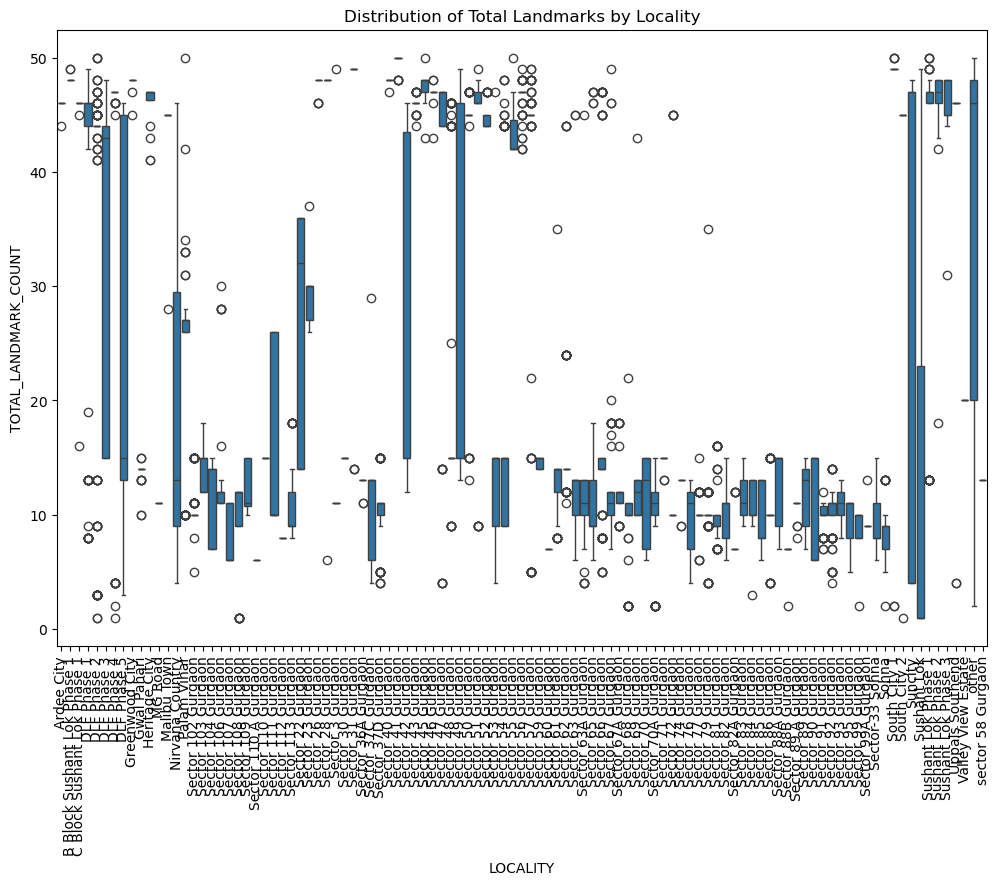

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='LOCALITY', y='TOTAL_LANDMARK_COUNT', data=df6)
plt.xticks(rotation=90)  # Rotate locality labels for better readability
plt.title('Distribution of Total Landmarks by Locality')
plt.show()


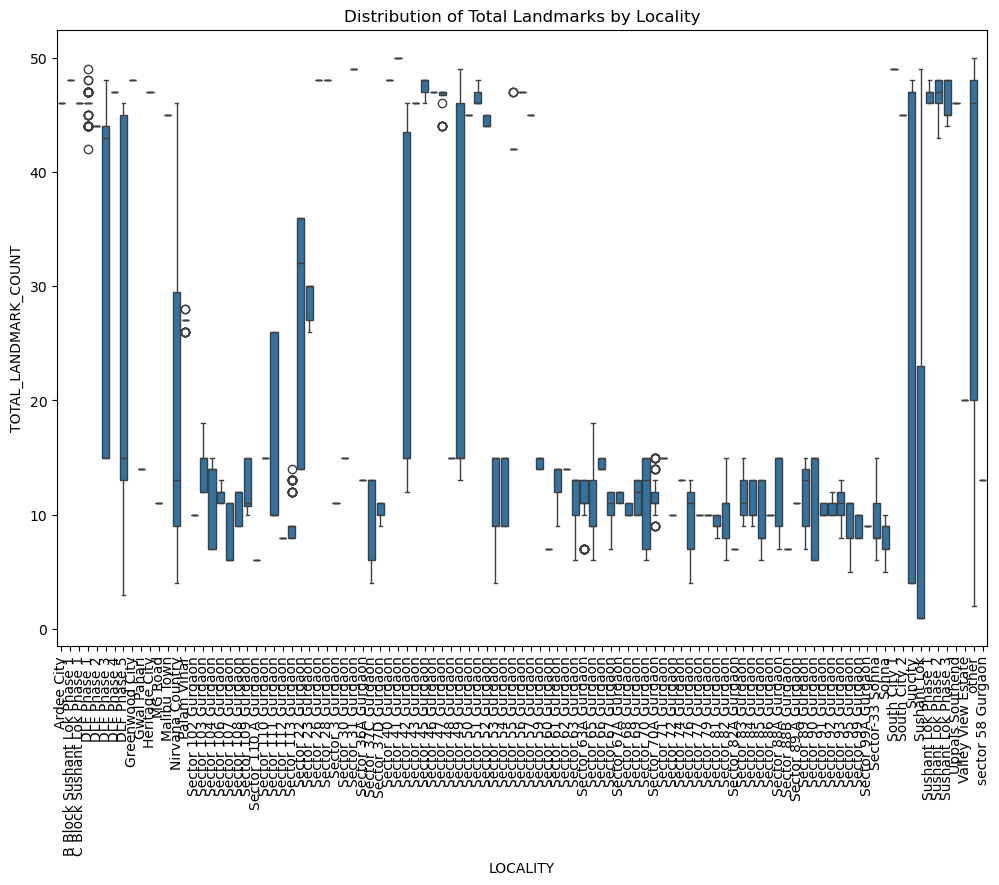

In [83]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='LOCALITY', y='TOTAL_LANDMARK_COUNT', data=df7)
plt.xticks(rotation=90)  # Rotate locality labels for better readability
plt.title('Distribution of Total Landmarks by Locality')
plt.show()

In [84]:
df7

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,AMENITIES,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA
0,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,4,3,2,3,3.0,R,"5,32,23,24,6,29,19,25,26,101,102",46.0,139.00,2160
1,Independent/Builder Floor,Ardee City,1.0,1,4.0,4,2.0,4,5,1,2,4.0,R,"5,32,23,24,6,29,19,25,26,101,102",46.0,189.00,1900
2,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,4,7,2,1,3.0,R,"5,32,23,24,6,29,19,25,26,101,102",46.0,159.00,2160
3,Independent/Builder Floor,Ardee City,1.0,1,2.0,2,2.0,4,4,2,2,2.0,R,"44,23,45,24,47,19,9,30,43,12,25,26,102,103",46.0,90.99,1040
4,Residential Apartment,Ardee City,1.0,1,3.0,3,4.0,4,5,1,9,15.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,28,29,30,39...",46.0,230.00,2585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,6,1,4,7.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,29,30,39,19...",13.0,270.00,1634
7083,Residential Apartment,sector 58 Gurgaon,1.0,1,3.0,4,2.0,4,3,2,12,21.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,29,30,39,19...",13.0,450.00,2427
7084,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,3,1,4,7.0,R,"10,32,17,5,20,21,23,24,46,47,28,29,30,39,19,1,...",13.0,260.00,1625
7085,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,4,1,15,29.0,R,"10,32,17,5,20,21,44,23,45,24,46,47,28,29,30,39...",13.0,250.00,1375


In [85]:
# Assuming df is your DataFrame and 'listing' is the name of the column
category_counts = df7['LISTING'].value_counts()
count_P = category_counts.get('P', 0)

print(f"Number of rows in category 'P': {count_P}")


Number of rows in category 'P': 312


In [86]:
# Split the 'AMENITIES' string into a list, convert to a set for distinct values, and count the number of distinct elements
df7['TOTAL_AMENITIES'] = df7['AMENITIES'].apply(lambda x: len(set(map(int, x.split(',')))))


In [87]:
df7=df7.drop(columns=['AMENITIES'])

In [88]:
df7

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA,TOTAL_AMENITIES
0,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,4,3,2,3,3.0,R,46.0,139.00,2160,11
1,Independent/Builder Floor,Ardee City,1.0,1,4.0,4,2.0,4,5,1,2,4.0,R,46.0,189.00,1900,11
2,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,4,7,2,1,3.0,R,46.0,159.00,2160,11
3,Independent/Builder Floor,Ardee City,1.0,1,2.0,2,2.0,4,4,2,2,2.0,R,46.0,90.99,1040,14
4,Residential Apartment,Ardee City,1.0,1,3.0,3,4.0,4,5,1,9,15.0,R,46.0,230.00,2585,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,6,1,4,7.0,R,13.0,270.00,1634,29
7083,Residential Apartment,sector 58 Gurgaon,1.0,1,3.0,4,2.0,4,3,2,12,21.0,R,13.0,450.00,2427,29
7084,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,3,1,4,7.0,R,13.0,260.00,1625,30
7085,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,4,4,1,15,29.0,R,13.0,250.00,1375,32


In [89]:
df7.FURNISH.unique()

array([4, 2, 1, 0])

In [90]:
df7['FURNISH'] = df7['FURNISH'].replace(4, 3)

In [91]:
df7.FURNISH.unique()

array([3, 2, 1, 0])

In [92]:
df7.FACING.unique()

array([3, 5, 7, 4, 6, 2, 1, 0, 8])

In [93]:
df7

,PROPERTY_TYPE,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA,TOTAL_AMENITIES
0,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,3,3,2,3,3.0,R,46.0,139.00,2160,11
1,Independent/Builder Floor,Ardee City,1.0,1,4.0,4,2.0,3,5,1,2,4.0,R,46.0,189.00,1900,11
2,Independent/Builder Floor,Ardee City,1.0,1,3.0,3,2.0,3,7,2,1,3.0,R,46.0,159.00,2160,11
3,Independent/Builder Floor,Ardee City,1.0,1,2.0,2,2.0,3,4,2,2,2.0,R,46.0,90.99,1040,14
4,Residential Apartment,Ardee City,1.0,1,3.0,3,4.0,3,5,1,9,15.0,R,46.0,230.00,2585,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,3,6,1,4,7.0,R,13.0,270.00,1634,29
7083,Residential Apartment,sector 58 Gurgaon,1.0,1,3.0,4,2.0,3,3,2,12,21.0,R,13.0,450.00,2427,29
7084,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,3,3,1,4,7.0,R,13.0,260.00,1625,30
7085,Residential Apartment,sector 58 Gurgaon,1.0,1,2.0,2,1.0,3,4,1,15,29.0,R,13.0,250.00,1375,32


In [94]:
# Loop through each column in the dataframe and print the unique values
for column in df7.columns:
    print(f"Unique values in '{column}':")
    print(df7[column].unique())
    print("\n")


Unique values in 'PROPERTY_TYPE':
['Independent/Builder Floor' 'Residential Apartment']


Unique values in 'LOCALITY':
['Ardee City' 'B Block Sushant Lok Phase 1' 'C Block Sushant Lok Phase 1'
 'DLF Phase 1' 'DLF Phase 2' 'DLF Phase 3' 'DLF Phase 4' 'DLF Phase 5'
 'Greenwood City' 'Gwal Pahari' 'Heritage City' 'MG Road' 'Malibu Town'
 'Nirvana Country' 'Palam Vihar' 'Sector 102 Gurgaon' 'Sector 103 Gurgaon'
 'Sector 104 Gurgaon' 'Sector 106 Gurgaon' 'Sector 107 Gurgaon'
 'Sector 108 Gurgaon' 'Sector 109 Gurgaon' 'Sector 110 A Gurgaon'
 'Sector 110 Gurgaon' 'Sector 111 Gurgaon' 'Sector 112 Gurgaon'
 'Sector 113 Gurgaon' 'Sector 22 Gurgaon' 'Sector 23 Gurgaon'
 'Sector 26 Gurgaon' 'Sector 28 Gurgaon' 'Sector 3 Gurgaon'
 'Sector 30 Gurgaon' 'Sector 31 Gurgaon' 'Sector 36A Gurgaon'
 'Sector 37C Gurgaon' 'Sector 37D Gurgaon' 'Sector 40 Gurgaon'
 'Sector 41 Gurgaon' 'Sector 42 Gurgaon' 'Sector 43 Gurgaon'
 'Sector 45 Gurgaon' 'Sector 46 Gurgaon' 'Sector 47 Gurgaon'
 'Sector 48 Gurgaon' 'Sect

In [95]:
# Convert the column to floats
df7['FLOOR_NUM'] = df7['FLOOR_NUM'].astype(float)


In [96]:
len(df7[df7.FLOOR_NUM==df7.TOTAL_FLOOR])

611

In [97]:
# Count rows where 'TOTAL_FLOOR' is equal to 0
count_total_floor_zero = df7[df7['TOTAL_FLOOR'] == 0].shape[0]

# Output the result
print(count_total_floor_zero)


1


In [98]:
df7 = df7[df7['TOTAL_FLOOR'] != 0]

In [99]:
# Loop through each column in the dataframe and print the unique values
for column in df7.columns:
    print(f"Unique values in '{column}':")
    print(df7[column].unique())
    print("\n")


Unique values in 'PROPERTY_TYPE':
['Independent/Builder Floor' 'Residential Apartment']


Unique values in 'LOCALITY':
['Ardee City' 'B Block Sushant Lok Phase 1' 'C Block Sushant Lok Phase 1'
 'DLF Phase 1' 'DLF Phase 2' 'DLF Phase 3' 'DLF Phase 4' 'DLF Phase 5'
 'Greenwood City' 'Gwal Pahari' 'Heritage City' 'MG Road' 'Malibu Town'
 'Nirvana Country' 'Palam Vihar' 'Sector 102 Gurgaon' 'Sector 103 Gurgaon'
 'Sector 104 Gurgaon' 'Sector 106 Gurgaon' 'Sector 107 Gurgaon'
 'Sector 108 Gurgaon' 'Sector 109 Gurgaon' 'Sector 110 A Gurgaon'
 'Sector 110 Gurgaon' 'Sector 111 Gurgaon' 'Sector 112 Gurgaon'
 'Sector 113 Gurgaon' 'Sector 22 Gurgaon' 'Sector 23 Gurgaon'
 'Sector 26 Gurgaon' 'Sector 28 Gurgaon' 'Sector 3 Gurgaon'
 'Sector 30 Gurgaon' 'Sector 31 Gurgaon' 'Sector 36A Gurgaon'
 'Sector 37C Gurgaon' 'Sector 37D Gurgaon' 'Sector 40 Gurgaon'
 'Sector 41 Gurgaon' 'Sector 42 Gurgaon' 'Sector 43 Gurgaon'
 'Sector 45 Gurgaon' 'Sector 46 Gurgaon' 'Sector 47 Gurgaon'
 'Sector 48 Gurgaon' 'Sect

In [100]:
len(df7[df7.FLOOR_NUM==df7.TOTAL_FLOOR])

610

In [101]:
type(df7)

pandas.core.frame.DataFrame

In [102]:
# Decrease 'FLOOR_NUMBER' by 1 where 'TOTAL_FLOOR' equals 'FLOOR_NUMBER'
df7.loc[df7['TOTAL_FLOOR'] == df7['FLOOR_NUM'], 'FLOOR_NUM'] -= 1


In [103]:
df7.shape

(7086, 17)

In [104]:
len(df7[df7.FLOOR_NUM==df7.TOTAL_FLOOR])

0

In [105]:
df8= df7.drop(columns=['TRANSACT_TYPE'])

In [106]:
df8.shape

(7086, 16)

In [107]:
df8

,PROPERTY_TYPE,LOCALITY,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA,TOTAL_AMENITIES
0,Independent/Builder Floor,Ardee City,1,3.0,3,2.0,3,3,2,2.0,3.0,R,46.0,139.00,2160,11
1,Independent/Builder Floor,Ardee City,1,4.0,4,2.0,3,5,1,2.0,4.0,R,46.0,189.00,1900,11
2,Independent/Builder Floor,Ardee City,1,3.0,3,2.0,3,7,2,1.0,3.0,R,46.0,159.00,2160,11
3,Independent/Builder Floor,Ardee City,1,2.0,2,2.0,3,4,2,1.0,2.0,R,46.0,90.99,1040,14
4,Residential Apartment,Ardee City,1,3.0,3,4.0,3,5,1,9.0,15.0,R,46.0,230.00,2585,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,Residential Apartment,sector 58 Gurgaon,1,2.0,2,1.0,3,6,1,4.0,7.0,R,13.0,270.00,1634,29
7083,Residential Apartment,sector 58 Gurgaon,1,3.0,4,2.0,3,3,2,12.0,21.0,R,13.0,450.00,2427,29
7084,Residential Apartment,sector 58 Gurgaon,1,2.0,2,1.0,3,3,1,4.0,7.0,R,13.0,260.00,1625,30
7085,Residential Apartment,sector 58 Gurgaon,1,2.0,2,1.0,3,4,1,15.0,29.0,R,13.0,250.00,1375,32


In [108]:
type(df8)

pandas.core.frame.DataFrame

In [109]:
df9=df8.copy()

In [110]:
from sklearn.preprocessing import LabelEncoder
le_property_type = LabelEncoder()
le_listing = LabelEncoder()

df8['PROPERTY_TYPE'] = le_property_type.fit_transform(df8['PROPERTY_TYPE'])
df8['LISTING'] = le_listing.fit_transform(df8['LISTING'])


In [111]:
df8

,PROPERTY_TYPE,LOCALITY,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA,TOTAL_AMENITIES
0,0,Ardee City,1,3.0,3,2.0,3,3,2,2.0,3.0,1,46.0,139.00,2160,11
1,0,Ardee City,1,4.0,4,2.0,3,5,1,2.0,4.0,1,46.0,189.00,1900,11
2,0,Ardee City,1,3.0,3,2.0,3,7,2,1.0,3.0,1,46.0,159.00,2160,11
3,0,Ardee City,1,2.0,2,2.0,3,4,2,1.0,2.0,1,46.0,90.99,1040,14
4,1,Ardee City,1,3.0,3,4.0,3,5,1,9.0,15.0,1,46.0,230.00,2585,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,1,sector 58 Gurgaon,1,2.0,2,1.0,3,6,1,4.0,7.0,1,13.0,270.00,1634,29
7083,1,sector 58 Gurgaon,1,3.0,4,2.0,3,3,2,12.0,21.0,1,13.0,450.00,2427,29
7084,1,sector 58 Gurgaon,1,2.0,2,1.0,3,3,1,4.0,7.0,1,13.0,260.00,1625,30
7085,1,sector 58 Gurgaon,1,2.0,2,1.0,3,4,1,15.0,29.0,1,13.0,250.00,1375,32


# linear regression models

## box-cox transoformation for linear regression

In [114]:
df9.PRICE.describe()

count    7086.000000
mean      277.596936
std       264.423981
min        16.000000
25%       150.000012
50%       217.000000
75%       340.000000
max      5500.000000
Name: PRICE, dtype: float64

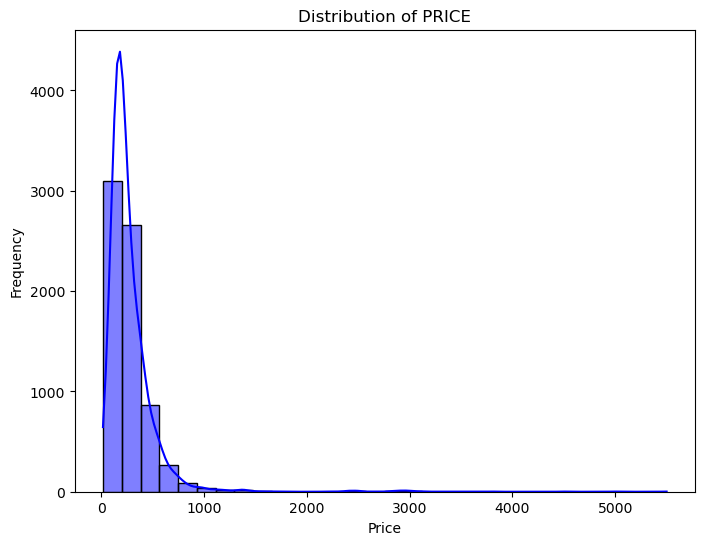

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram for 'PRICE'
plt.figure(figsize=(8, 6))
sns.histplot(df9['PRICE'], kde=True, bins=30, color='blue')

plt.title('Distribution of PRICE')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


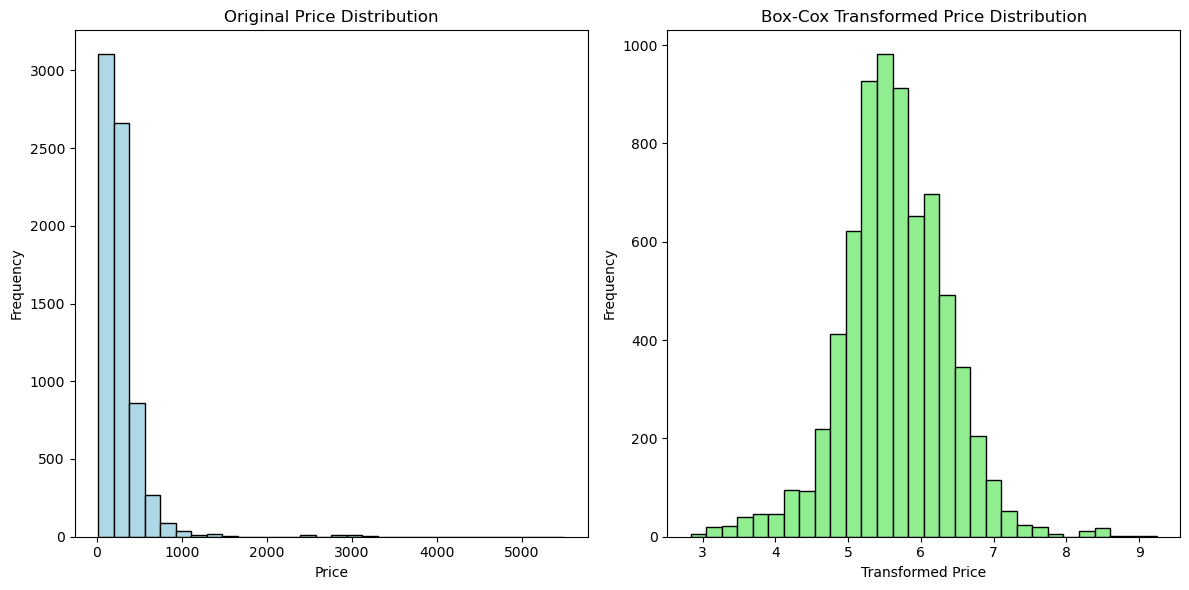

Lambda used for Box-Cox transformation: 0.016192656357111264


In [116]:
from scipy.stats import boxcox
price_transformed, fitted_lambda = boxcox(df9['PRICE'])

# Add the transformed data to your DataFrame (optional)
df9['PRICE_BOXCOX'] = price_transformed

# Plot the original and transformed distributions for comparison
plt.figure(figsize=(12, 6))

# Original distribution
plt.subplot(1, 2, 1)
plt.hist(df9['PRICE'], bins=30, color='lightblue', edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Transformed distribution
plt.subplot(1, 2, 2)
plt.hist(df9['PRICE_BOXCOX'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Box-Cox Transformed Price Distribution')
plt.xlabel('Transformed Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Lambda used for Box-Cox transformation: {fitted_lambda}")

In [117]:
from sklearn.preprocessing import LabelEncoder
le_property_type = LabelEncoder()
le_listing = LabelEncoder()

df9['PROPERTY_TYPE'] = le_property_type.fit_transform(df9['PROPERTY_TYPE'])
df9['LISTING'] = le_listing.fit_transform(df9['LISTING'])


In [118]:
df9

,PROPERTY_TYPE,LOCALITY,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA,TOTAL_AMENITIES,PRICE_BOXCOX
0,0,Ardee City,1,3.0,3,2.0,3,3,2,2.0,3.0,1,46.0,139.00,2160,11,5.136969
1,0,Ardee City,1,4.0,4,2.0,3,5,1,2.0,4.0,1,46.0,189.00,1900,11,5.470631
2,0,Ardee City,1,3.0,3,2.0,3,7,2,1.0,3.0,1,46.0,159.00,2160,11,5.282740
3,0,Ardee City,1,2.0,2,2.0,3,4,2,1.0,2.0,1,46.0,90.99,1040,14,4.679570
4,1,Ardee City,1,3.0,3,4.0,3,5,1,9.0,15.0,1,46.0,230.00,2585,30,5.684695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,1,sector 58 Gurgaon,1,2.0,2,1.0,3,6,1,4.0,7.0,1,13.0,270.00,1634,29,5.860025
7083,1,sector 58 Gurgaon,1,3.0,4,2.0,3,3,2,12.0,21.0,1,13.0,450.00,2427,29,6.421642
7084,1,sector 58 Gurgaon,1,2.0,2,1.0,3,3,1,4.0,7.0,1,13.0,260.00,1625,30,5.818716
7085,1,sector 58 Gurgaon,1,2.0,2,1.0,3,4,1,15.0,29.0,1,13.0,250.00,1375,32,5.775813


In [119]:
X = df9.drop(columns=['PRICE_BOXCOX'])  # Drop the original and transformed 'price' columns to get the features
y = df9['PRICE_BOXCOX']

In [120]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [121]:
X.shape

(7086, 123)

## splitting the data

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [124]:
X_train.shape

(5668, 123)

In [125]:
X_test.shape

(1418, 123)

### multiple linear regression model using backward elimination

In [127]:
type(y_test)

pandas.core.series.Series

In [128]:
import statsmodels.api as sm

# Step 2: Reset index for both X_train and y_train to ensure alignment
X_train = pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)

# Step 2: Reset index for both X_train and y_train to ensure alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Add a constant to both training and test sets (for the intercept term)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Step 3: Backward elimination function
def backward_elimination(X_train, y_train, SL=0.05):
    numVars = len(X_train.columns)
    for i in range(numVars):
        regressor_OLS = sm.OLS(y_train, X_train).fit()
        max_p_value = max(regressor_OLS.pvalues)
        if max_p_value > SL:
            excluded_col = regressor_OLS.pvalues.idxmax()
            X_train = X_train.drop(columns=[excluded_col])
        else:
            break
    return X_train, regressor_OLS

# Step 4: Perform backward elimination on the training data
X_train_optimal, regressor_OLS = backward_elimination(X_train, y_train)

# Display the summary of the final model
print(regressor_OLS.summary())

# Step 5: Remove the non-significant columns from X_test based on backward elimination
X_test_optimal = X_test[X_train_optimal.columns]

# Step 6: Make predictions on the test data using the final model
y_pred = regressor_OLS.predict(X_test_optimal)

# Optionally, evaluate the performance of the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error on the test set: {mse}")
print(f"R-squared on the test set: {r2}")

                            OLS Regression Results                            
Dep. Variable:           PRICE_BOXCOX   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     584.2
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:40:57   Log-Likelihood:                 367.62
No. Observations:                5668   AIC:                            -557.2
Df Residuals:                    5579   BIC:                             33.96
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0544      0.027    112.861      0.0

In [129]:
# model 1 : name- regressor_OLS (multiple linear regression model using backward elimination)

In [130]:
# Step 4: Calculate AIC value
aic_value = regressor_OLS.aic
print(f"AIC Value: {aic_value}")


AIC Value: -557.2347514037319


from statsmodels.stats.outliers_influence import variance_inflation_factor
Step 5: Calculate VIF for each feature
 Note: We exclude the constant term from VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

### multiple linear regression model using PCA

In [133]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Convert all feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# 1. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Apply PCA
pca = PCA(n_components=0.95)  # Choose the number of components to explain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Fit Multiple Linear Regression using statsmodels
X_train_pca_with_const = sm.add_constant(X_train_pca)  # Add constant term (intercept)
model = sm.OLS(y_train, X_train_pca_with_const)
results = model.fit()

# Print model summary
print(results.summary())

# 4. Predict and evaluate
X_test_pca_with_const = sm.add_constant(X_test_pca)  # Add constant term (intercept) for test data
y_pred = results.predict(X_test_pca_with_const)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


                            OLS Regression Results                            
Dep. Variable:           PRICE_BOXCOX   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     400.6
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        04:40:58   Log-Likelihood:                -84.405
No. Observations:                5668   AIC:                             384.8
Df Residuals:                    5560   BIC:                             1102.
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6427      0.003   1713.148      0.0

In [134]:
aic_value = results.aic
print(f"AIC Value: {aic_value}")

AIC Value: 384.8093103647461


# polynomial regression models

In [136]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Assume X_train, X_test, y_train_transformed, y_test_transformed, lambda_ are already defined

# 1. Prepare Polynomial Features
poly = PolynomialFeatures(degree=2)  # Choose the degree for polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 2. Fit Polynomial Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 3. Predict and Inverse Transform
y_pred_transformed = model.predict(X_test_poly)
#y_pred = inverse_boxcox(y_pred_transformed,lambda_= 0.016192656357111264)

# Inverse Box-Cox transformation for test data
#y_test2 = inverse_boxcox(y_test,lambda_= 0.016192656357111264)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_transformed)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_transformed)}")


Mean Squared Error: 0.017836438708741773
R^2 Score: 0.9644983812997847


# svr 

In [138]:
df8

,PROPERTY_TYPE,LOCALITY,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,LISTING,TOTAL_LANDMARK_COUNT,PRICE,TOTAL_AREA,TOTAL_AMENITIES
0,0,Ardee City,1,3.0,3,2.0,3,3,2,2.0,3.0,1,46.0,139.00,2160,11
1,0,Ardee City,1,4.0,4,2.0,3,5,1,2.0,4.0,1,46.0,189.00,1900,11
2,0,Ardee City,1,3.0,3,2.0,3,7,2,1.0,3.0,1,46.0,159.00,2160,11
3,0,Ardee City,1,2.0,2,2.0,3,4,2,1.0,2.0,1,46.0,90.99,1040,14
4,1,Ardee City,1,3.0,3,4.0,3,5,1,9.0,15.0,1,46.0,230.00,2585,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7082,1,sector 58 Gurgaon,1,2.0,2,1.0,3,6,1,4.0,7.0,1,13.0,270.00,1634,29
7083,1,sector 58 Gurgaon,1,3.0,4,2.0,3,3,2,12.0,21.0,1,13.0,450.00,2427,29
7084,1,sector 58 Gurgaon,1,2.0,2,1.0,3,3,1,4.0,7.0,1,13.0,260.00,1625,30
7085,1,sector 58 Gurgaon,1,2.0,2,1.0,3,4,1,15.0,29.0,1,13.0,250.00,1375,32


In [139]:
X2 = df9.drop(columns=['PRICE'])  # Drop the original and transformed 'price' columns to get the features
y2 = df9['PRICE']

In [140]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [1,2])], remainder='passthrough')
X2 = np.array(ct.fit_transform(X2))

In [141]:
X2.shape

(7086, 123)

In [142]:

y2_np = y2.to_numpy().reshape(-1, 1)  # Reshape to be 2D

# Initialize scalers
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scale features
X = sc_X.fit_transform(X2)

# Scale target
y = sc_y.fit_transform(y2_np)


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [144]:
y_train

array([[-0.12328397],
       [-0.65277406],
       [ 0.02799892],
       ...,
       [-0.03251423],
       [ 1.20044128],
       [-0.81351213]])

In [145]:
from sklearn.svm import SVR
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [146]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on X_test
y_pred = model_svr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the MSE and R² value
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.04282234591401008
R² Score: 0.941440990180196


# decision tree 

In [148]:
from sklearn.tree import DecisionTreeRegressor
model_decision = DecisionTreeRegressor(random_state = 0)
model_decision.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [149]:
# Predict on X_test
y_pred = model_decision.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the MSE and R² value
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.0002282442308685177
R² Score: 0.9996878789363015


# Random forest

In [151]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators = 50, random_state = 0)
model_random.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=50, random_state=0)

In [152]:
# Predict on X_test
y_pred = model_random.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Print the MSE and R² value
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 8.85886049577758e-05
R² Score: 0.9998788562168438
